In [1]:
import numpy as np
import pandas as pd
from time import time

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns; sns.set() 

import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import re
from numpy import random
import seaborn as sb
import matplotlib.pyplot as plt

rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)

set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

filename = 'gbm_tsn_Neoplastic.csv'
df = pd.read_csv(filename)
df.describe

#df = pd.read_csv('gbm_tsn_ndb_Immune.csv', names=['F1', 'F2', 'Class','F3', 'F4' ])
# Display example observations
df.head()

F1         F2  Class          F4
0  19.555715 -66.420423  Tumor  Neoplastic
1   8.197811 -63.763646  Tumor  Neoplastic
2  -6.468824 -51.283635  Tumor  Neoplastic
3  -9.436247 -53.896430  Tumor  Neoplastic
4  -9.937541 -58.177118  Tumor  Neoplastic

In [2]:
# Transform into binary classification
df['Class'] = [1 if b=='Tumor' else 0 for b in df.Class]
 
df['Class'].value_counts()

1    1029
0      62
Name: Class, dtype: int64

In [3]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df.Class==1]
df_minority = df[df.Class==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1029,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Class.value_counts()
# 1    1182
# 0    1182
# Name: balance, dtype: int64

1    1029
0    1029
Name: Class, dtype: int64

In [4]:
# Separate input features (X) and target variable (y)
y = df_upsampled.Class
X = df_upsampled.drop(columns=['Class', 'F4'])

In [5]:
# Separate input features (X) and target variable (y)
# Original data base
#y = df.Class
#X = df.drop(columns=['Class', 'F4'])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

forest = RandomForestClassifier(n_estimators=2500, random_state=0, max_depth = 6)
forest.fit(X_train,y_train)
y_score = forest.predict(X_test)

In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(accuracy_score(y_score, y_test))
print(confusion_matrix(y_score, y_test))
print(classification_report(y_score, y_test))

0.9975728155339806
[[198   1]
 [  0 213]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       199
           1       1.00      1.00      1.00       213

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



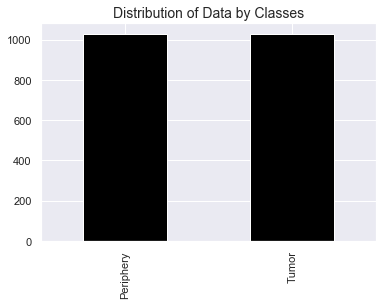

In [8]:
patterns_colors = ['Black', 'Black']

patterns_labels = ['Periphery','Tumor']

correct_Pattern_labels = df_upsampled['Class'].values

patterns_counts = df_upsampled['Class'].value_counts().sort_index()

patterns_counts.index = patterns_labels

patterns_counts.plot(kind='bar',color=patterns_colors,
                         title='Distribution of Data by Classes')
patterns_counts
plt.show()

In [9]:
patterns_counts

Periphery    1029
Tumor        1029
Name: Class, dtype: int64

In [10]:
from sklearn.utils import resample
# Separate majority and minority classes
# Separate majority and minority classes
df_majority = df[df.Class==1]
df_minority = df[df.Class==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=62,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.Class.value_counts()
# 1    665
# 0    665
# Name: balance, dtype: int64


1    62
0    62
Name: Class, dtype: int64

In [11]:
# Separate input features (X) and target variable (y)
y = df_downsampled.Class
X = df_downsampled.drop(columns=['Class', 'F4'])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

forest = RandomForestClassifier(n_estimators=2500, random_state=0, max_depth = 6)
forest.fit(X_train,y_train)
y_score = forest.predict(X_test)

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(accuracy_score(y_score, y_test))
print(confusion_matrix(y_score, y_test))
print(classification_report(y_score, y_test))

0.96
[[10  0]
 [ 1 14]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.93      0.97        15

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25



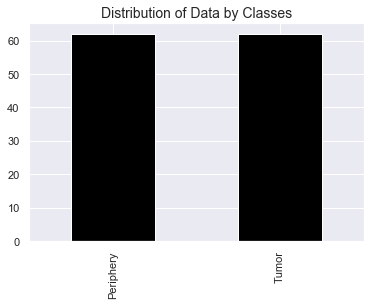

In [14]:
patterns_colors = ['Black', 'Black']

patterns_labels = ['Periphery','Tumor']

correct_Pattern_labels = df_downsampled['Class'].values

patterns_counts = df_downsampled['Class'].value_counts().sort_index()

patterns_counts.index = patterns_labels

patterns_counts.plot(kind='bar',color=patterns_colors,
                         title='Distribution of Data by Classes')
patterns_counts
plt.show()

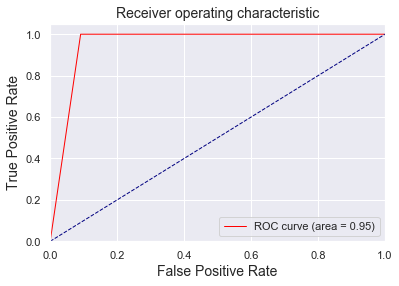

In [15]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Perform predictions
As we model the classifier. Now let’s take few observations from test dataset and print what our model is predicting and what the actual target.

In [16]:
 for i in range(0, 25):
        print ("Actual outcome :: {} and Predicted outcome :: {}".format(list(y_test)[i], y_score[i]))

Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcom

In [17]:
print("Train Accuracy :: ", accuracy_score(y_train, forest.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, y_score))

Train Accuracy ::  1.0
Test Accuracy  ::  0.96
